In [3]:
# predict sales revenue
# aid future marketing plans
# plan recruitment strategy
# motivate sales teams
# predict challenges early

# XGBoost is used in Big Mart Sales Prediction because it handles missing values, prevents overfitting, works well with tabular data, 
# and delivers high accuracy through gradient boosting.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
sales_data = pd.read_csv('C:/Users/KIIT0001/Desktop/MAHASWETA/ML/big_mart_data.csv')
sales_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [6]:
sales_data.shape

(8523, 12)

In [7]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# handling missing values

In [9]:
# mean - average
# mode - more repeated values

In [10]:
# mean value of "Item_Weight" column
sales_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [11]:
# filling the missing values in "Item_weight column" with "Mean" value
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18140\3542489448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)


In [12]:
# mode of "Outlet_Size" column
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [13]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

# values = 'column_name'
# columns = organizes the pivot table by Outlet_Type, allowing us to analyze Outlet_Size for different outlet types
# applies a lambda function that computes the mode (most frequent value) of Outlet_Size for each Outlet_Type and selects the first mode value ([0]).
   
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
miss_values = sales_data['Outlet_Size'].isnull()   
     
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
     
# checking for missing values now
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# numerical features

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18140\2926134407.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'])


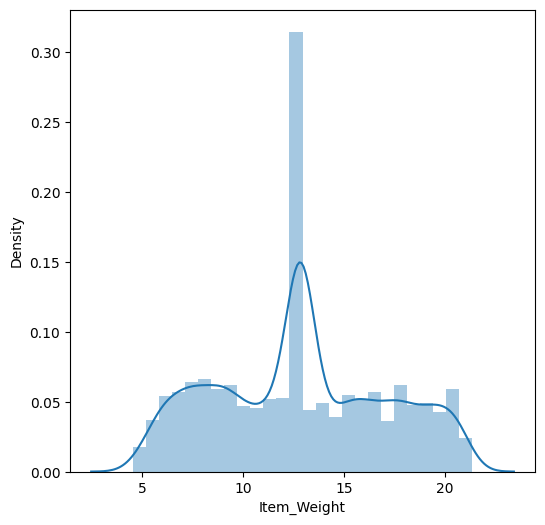

In [16]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Weight'])
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18140\1456249655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'])


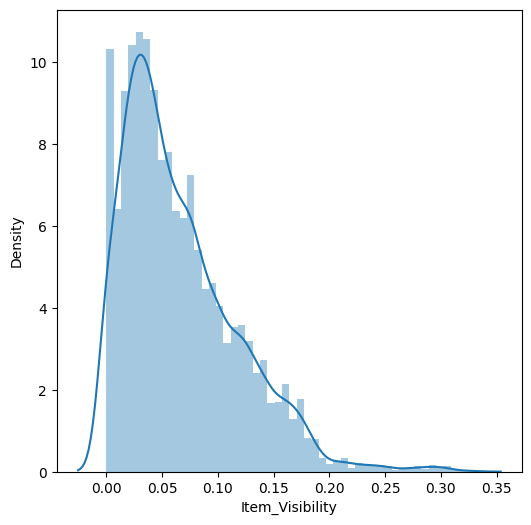

In [17]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Visibility'])
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18140\2000805005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'])


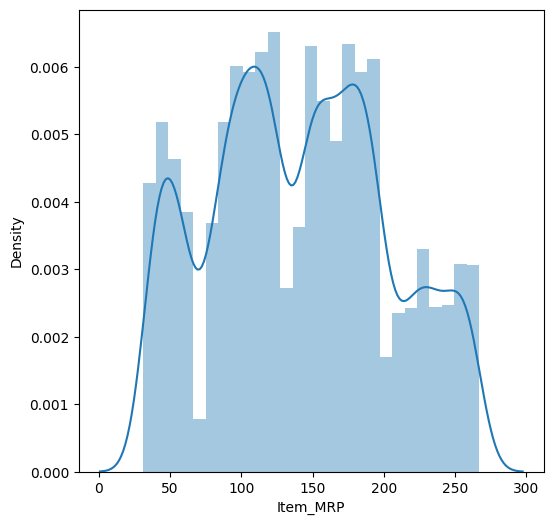

In [18]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_MRP'])
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18140\3396017348.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Outlet_Sales'])


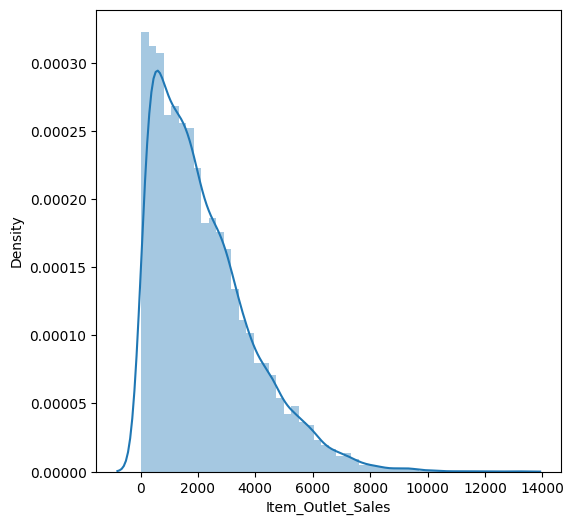

In [19]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Outlet_Sales'])
plt.show()

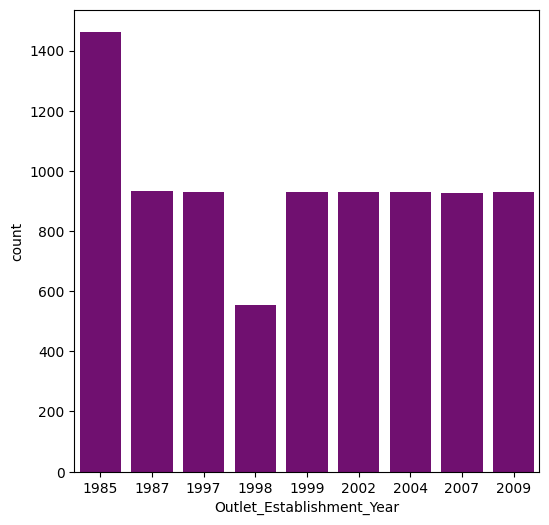

In [20]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=sales_data,color='purple')
plt.show()

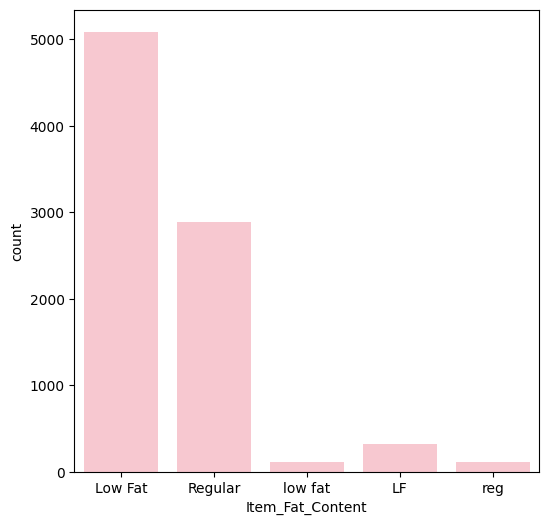

In [21]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=sales_data,color='pink')
plt.show()

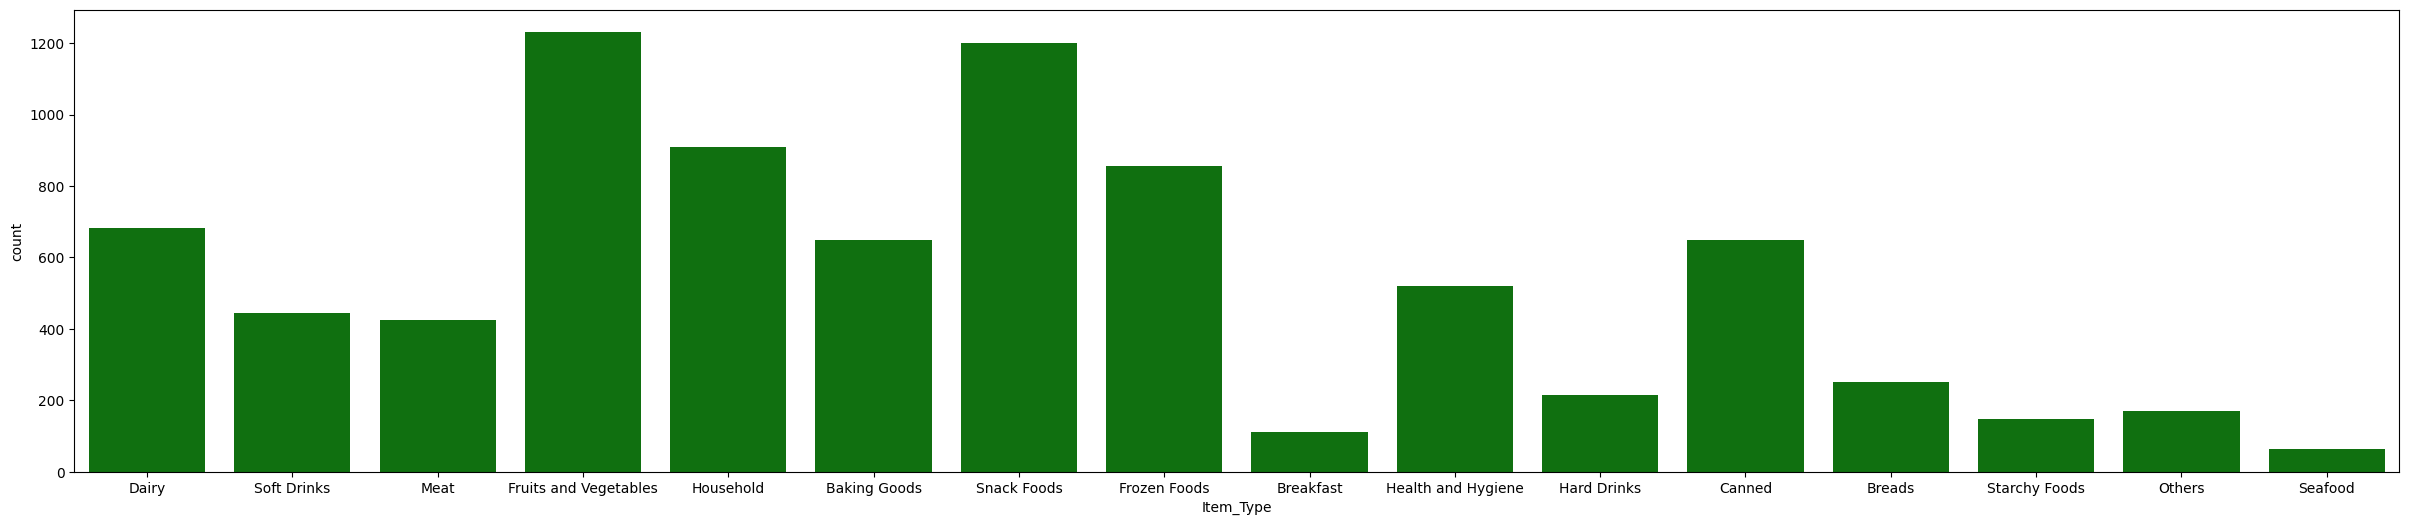

In [22]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=sales_data,color='green')
plt.show()

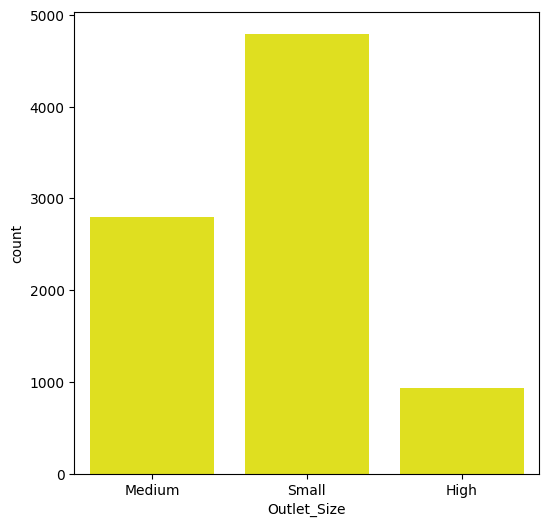

In [23]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=sales_data,color='yellow')
plt.show()

# data pre-processing

In [24]:
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [25]:
sales_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
     
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# label encoding

In [26]:
encoder = LabelEncoder()

In [40]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [28]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# spliting feature and target

In [29]:
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = sales_data['Item_Outlet_Sales']
     
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

# splitting training and test data 

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
     
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# train model

In [31]:
regressor = XGBRegressor()
     
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# model evaluation

In [32]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [33]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
     
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [34]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [35]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
     
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


# predictive system

In [44]:
input_data = (156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1)

numpy_array_of_input_data = np.asarray(input_data)

input_data_reshaped = numpy_array_of_input_data.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

if prediction[0] > 0:
    print(f"Predicted sales for the item: {prediction[0]}")
else:
    print("Sales prediction unavailable or invalid")

[4280.985]
Predicted sales for the item: 4280.98486328125
